# 1) Cargamos los datos:

In [1]:
import pandas as pd

data = pd.read_csv("../data/ohe_customer_dataset.csv", sep=",") 

data

,transactionFailed,fraudulent,"orderAmount_(9.999, 18.4]","orderAmount_(18.4, 30.0]","orderAmount_(30.0, 39.0]","orderAmount_(39.0, 47.0]","orderAmount_(47.0, 353.0]",orderAmount_desconocido,orderState_failed,orderState_fulfilled,...,emailDomain_com,emailDomain_info,emailDomain_net,emailDomain_org,emailDomain_weird,customerIPAddressSimplified_digits_and_letters,customerIPAddressSimplified_only_letters,sameCity_no,sameCity_unknown,sameCity_yes
0,False,0,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
1,False,1,False,True,False,False,False,False,False,True,...,True,False,False,False,False,False,True,True,False,False
2,False,0,False,False,False,True,False,False,False,True,...,True,False,False,False,False,True,False,True,False,False
3,False,0,False,True,False,False,False,False,False,True,...,True,False,False,False,False,True,False,True,False,False
4,True,1,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,True,2,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False
619,True,2,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False
620,False,2,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False
621,False,2,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False


Crearemos un nuevo dataframe unicamente con las columnas relevantes y trabajaremos sobre el:

In [2]:
from funpymodeling import status

filter_data = data[["orderState_failed",
                    "orderState_fulfilled", 
                    "orderState_pending", 
                    "transactionFailed", 
                    "fraudulent", 
                    "customerIPAddressSimplified_digits_and_letters"]].copy()

status(filter_data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderState_failed,0,0.0,573,0.919743,2,bool
1,orderState_fulfilled,0,0.0,223,0.357945,2,bool
2,orderState_pending,0,0.0,595,0.955056,2,bool
3,transactionFailed,0,0.0,455,0.730337,2,bool
4,fraudulent,0,0.0,107,0.171750,3,int64
5,customerIPAddressSimplified_digits_and_letters,0,0.0,546,0.876404,2,bool


# 4) Clustering con K-MEANS

### 4.2) Creacion del modelo

Establecemos los parametros de trabajo del modelo de cluster.

* **n_clusters=3**: indica el número de clusters (o grupos) que el modelo debe encontrar en los datos. En este caso, está configurado para agrupar los datos en 3 clusters.

* **init='k-means++'**: especifica el método de inicialización de los centroides. k-means++ es una técnica que ayuda a seleccionar puntos de inicio (centroides) de manera más eficiente para evitar convergencias lentas o a un mínimo local. Es el método por defecto y generalmente mejora el rendimiento del algoritmo.

* **max_iter=100**: define el número máximo de iteraciones que el algoritmo realizará en una sola ejecución para optimizar los centroides. Si el algoritmo alcanza este límite sin converger, se detiene.

* **random_state=0**: establece una semilla para la generación de números aleatorios, lo cual asegura que los resultados del modelo sean reproducibles. Al establecer random_state, se obtienen los mismos clusters cada vez que se ejecuta el código.

* **n_init='auto'**: determina el número de veces que se ejecutará el algoritmo completo con diferentes inicializaciones de los centroides. El valor 'auto' ajusta n_init a un valor adecuado basado en la versión de sklearn, para que el algoritmo obtenga una solución de mayor calidad al probar varias inicializaciones.

In [3]:
from sklearn.cluster import KMeans

cluster_model = KMeans(
    n_clusters=3,           
    init='k-means++',       
    max_iter=100,           
    random_state=0,
    n_init='auto'
)

cluster_model.fit(filter_data)

KMeans(max_iter=100, n_clusters=3, random_state=0)

Usamos el modelo creado anteriormente para predecir los clusters, le pasamos como argumento el dataframe 'filter_data' que tiene una selección de seis variables:

In [4]:
prediccion_cluster = cluster_model.predict(filter_data)

#Vemos los clusters para cada registro
prediccion_cluster

array([1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 2, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,

Asignamos las "etiquetas" antetiores creando una nueva variable en el dataframe 'filter_data'. 

In [5]:
variable_cluster = 'cluster'        # Nombre de la variable nueva que se agregará al dataframe
x_data_cluster = filter_data.copy() # Copiamos el dataframe para no alterar el original
x_data_cluster[variable_cluster] = cluster_model.predict(filter_data) # Obtenemos nuevamente las etiquetas y las asginamos
                                                                      # a la variable 'cluster'ArithmeticError

# Ahora cada registro contiene la asignación a un cluster especifico.

Verificamos que se agregó correctamente la variable al nuevo dataframe:

In [6]:
x_data_cluster.head()

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,False,False,True,False,0,False,1
1,False,True,False,False,1,False,0
2,False,True,False,False,0,True,1
3,False,True,False,False,0,True,1
4,False,True,False,True,1,False,2


In [14]:
from funpymodeling.model_validation import coord_plot

* **coord_plot**: Devuelve una tupla que contiene dos marcos de datos. El primero contiene la media de cada categoría en cada valor de 'group_var' (variable_cluster). El otro conjunto de datos es similar, pero está normalizado en función de los valores mínimo y máximo, en el rango [0-1]. También muestra el gráfico de coordenadas o paralelo.

* * x_data_cluster (primer argumento): Dataframe
* * variable_cluster (segundo argumento): Variable a analizar. Se calcula la media.
* * **d_orig**: Dataframe que contiene la media de la categoria.
* * **d_transf**: Dataframe que contiene la media,pero normalizada en función del rango entre 0-1

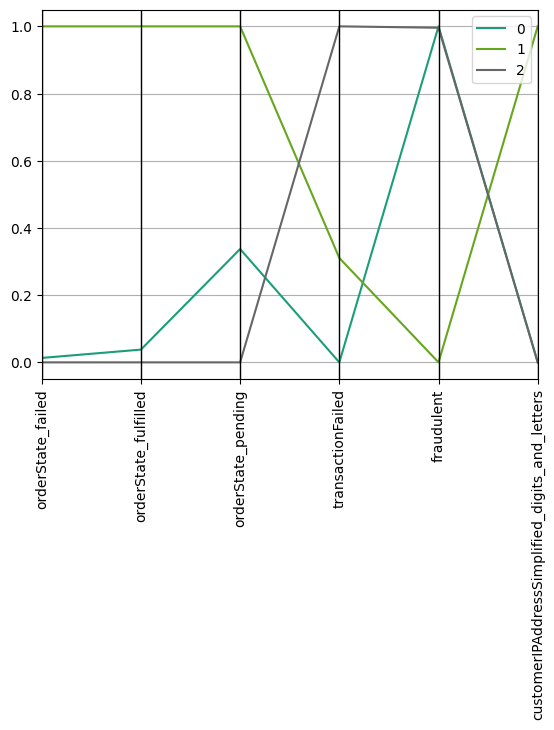

In [18]:
d_orig, d_transf = coord_plot(x_data_cluster, variable_cluster)

Visualizamos cada dataframe por separado para comprender la informacion que contiene cada uno y que compenen el grafico:

In [15]:
d_orig #Contiene la media de la categoria

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,0.071429,0.598901,0.041209,0.000000,1.928571,0.000000,0
1,0.113636,0.810606,0.075758,0.310606,0.189394,0.583333,1
2,0.070866,0.590551,0.023622,1.000000,1.921260,0.000000,2


In [17]:
d_transf # Hace las veces de eje Y

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,0.01315,0.037945,0.337327,0.000000,1.000000,0.0,0
1,1.00000,1.000000,1.000000,0.310606,0.000000,1.0,1
2,0.00000,0.000000,0.000000,1.000000,0.995796,0.0,2


### 4.4) Insights del grafico:

#1. Se puede observar que el cluster 1 agrupo los casos basandose en el estado de la orden. Podemos ver que cualquiera de los 3 casos no influye en si el cliente es fraudulento o no, ya que pare ese cluster todos los casos no son fraude.

#2. Para el cluster 2 se observa que si es determinante si la transacción falló independientemente del estado de la orden. Podemos inferir que ha nucleado todos los casos de fraude que tienen transacciones fallidas. 

#3. Por otra parte, el cluster 0 agrupa los casos dando mas importancia a estados de orden pendiente y los toma como fraude.

### Bonus: Scatter 3D

In [8]:
!pip install plotly

In [9]:
import plotly.express as px

fig = px.scatter_3d(x_data_cluster, 
                    x='orderState_failed', 
                    y='customerIPAddressSimplified_digits_and_letters', 
                    z='transactionFailed', 
                    color='fraudulent')

fig.show()

# 5) Clustering con HDBSCAN

In [10]:
!pip install hdbscan

### 5.2) Consideramos 15 clusters

In [ ]:
import hdbscan

Creamos un modelo de cluster con HDBSCAN y asignamos que para cada cluster tengamos 15 casos minimos. HDBSCAN hallará de forma automatica la cantidad de clusters. Utilizamos 'filter_data' como conjunto de datos para que analice.

In [11]:

# Ese 15 significa que cada cluster va a tener como mínimo 15 casos
model_hdb = hdbscan.HDBSCAN(min_cluster_size=15).fit(filter_data)

El método 'labels_' nos devuelve las etiquetas de todos los clusters, si lo combinamos con 'freq_tbl' podemos ver la cantidad de registros o casos asignados a cada uno de los clusters y por ende, podemos ver la cantidad de clusters creados.

In [12]:
from funpymodeling import freq_tbl
freq_tbl(model_hdb.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,6,196,0.314607,0.314607
1,8,105,0.168539,0.483146
2,-1,94,0.150883,0.634029
3,2,67,0.107544,0.741573
4,3,41,0.065811,0.807384
5,4,30,0.048154,0.855538
6,1,27,0.043339,0.898876
7,5,24,0.038523,0.9374
8,7,23,0.036918,0.974318
9,0,16,0.025682,1.0


Visualizamos solo las etiquetas de los clusters para cada registro:

In [32]:
model_hdb.labels_

array([-1,  5,  4,  4, -1, -1, -1,  5, -1,  5,  5,  1,  4, -1, -1,  5,  0,
        1, -1,  1,  1, -1,  1, -1,  4,  1, -1, -1, -1, -1, -1,  0, -1,  1,
       -1,  4,  1,  4, -1,  0, -1,  1,  0, -1,  0, -1,  5, -1,  4,  1,  5,
       -1,  4,  0,  4, -1,  4,  5,  4,  1,  5,  4, -1,  1, -1, -1, -1,  0,
       -1,  4,  1, -1, -1,  0,  4,  1, -1,  1, -1, -1,  5,  4,  5, -1,  5,
       -1, -1,  1, -1, -1, -1,  1, -1,  5,  4,  1, -1, -1, -1, -1,  1,  4,
       -1, -1, -1,  5,  1,  4,  5,  0,  1,  0, -1,  0, -1,  5,  4,  4,  0,
        5, -1, -1,  4, -1,  1,  4,  5,  4,  1, -1,  4,  4,  4,  5,  1,  1,
        5, -1, -1,  4,  0,  5, -1,  1,  5,  0, -1, -1, -1, -1, -1, -1,  0,
       -1,  4,  5, -1,  4, -1,  1, -1, -1,  4,  5, -1, -1, -1,  0,  6,  7,
        6,  6,  2,  6,  6,  6,  6,  6,  6,  6,  6,  6,  2,  7,  2,  2,  2,
        6, -1,  2,  6,  2,  7,  6,  6,  2,  2,  2,  6,  2,  6,  6,  2,  2,
        6,  6,  6,  6,  7,  6, -1,  6,  6,  6,  6,  6,  6,  2,  6,  6,  6,
        6, -1,  2,  2,  6

**NOTA**: En ambos casos podemos observar la presencia de '-1' que nos indica que esos casos/registros no pertenecen a ningun cluster por lo tanto serán removidos. 

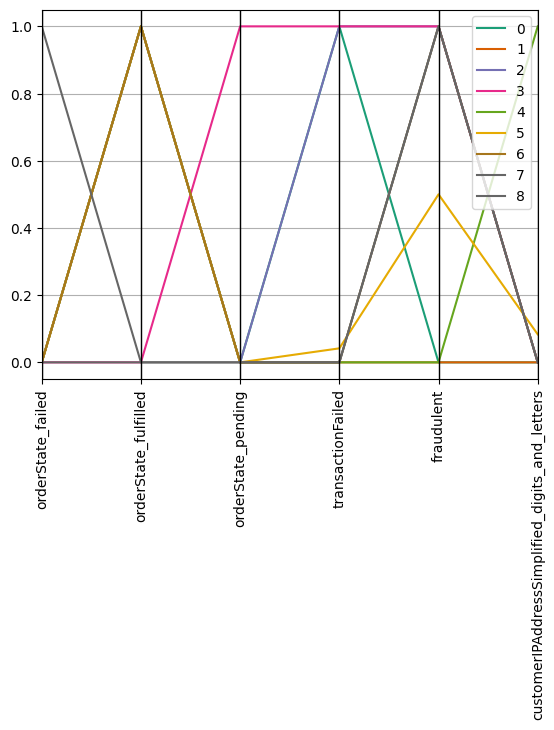

In [41]:
cluster_var = 'cluster'

#Creamos una copia del dataframe
x_data_cluster_without_noise = filter_data.copy()

#Creamos una nueva variable llamada 'cluster'. Asignamos a la variable 'cluster' las etitquedas 
# del modelo creado anteriormente ('model_hdb' -contiene ruido)
x_data_cluster_without_noise[cluster_var] = model_hdb.labels_

#Eliminamos todos los casos de ruido (-1)
x_data_cluster_without_noise = x_data_cluster_without_noise[x_data_cluster_without_noise['cluster']!=-1]

d_orig, d_transf = coord_plot(x_data_cluster_without_noise, cluster_var)


## Insights:

#1. Al tener mas clusters, el analisis de agrupación que realiza el modelo es mas puntilloso. El 'cluster 3' se ha concentrado en casos donde ha establecido que el cliente es fraudulento si el estado de la orden es pendiente y la transacción falló.

#2. El 'cluster 4' considera que los casos donde el IP es una combinación de digitos y letras, no son clientes fraudulentos.

#3. El 'cluster 8' agrupa los casos basándose en clientes fraudulentos cuyo estado de orden ha fallado.


BONUS -- Diferencias entre HDBSCAN Y KMEANS

`HDBSCAN` y `KMeans` son ambos algoritmos de clustering, pero difieren en su enfoque, en los tipos de datos para los que están diseñados y en cómo manejan la estructura de los clusters. A continuación, te explico las principales diferencias entre ambos:

### 1. **Base del Algoritmo**
   - **KMeans**: Es un algoritmo basado en partición. Busca dividir los datos en un número predefinido de clusters, optimizando la distancia (generalmente la distancia euclidiana) entre los puntos y los centroides de cada cluster. Su objetivo es minimizar la varianza dentro de cada cluster.
   - **HDBSCAN**: Es un algoritmo basado en densidad. Encuentra clusters de alta densidad de puntos y los separa de áreas de baja densidad, sin necesidad de especificar el número de clusters. Está basado en la técnica DBSCAN, pero incluye mejoras que permiten una mayor flexibilidad en la forma y tamaño de los clusters.

### 2. **Número de Clusters**
   - **KMeans**: Necesita que el usuario especifique el número de clusters (`n_clusters`). Esto puede ser una desventaja si no se sabe cuántos clusters están presentes en los datos.
   - **HDBSCAN**: No requiere especificar el número de clusters. Encuentra el número de clusters de manera automática, según la densidad de los datos. Sin embargo, permite ajustar el parámetro `min_cluster_size` para controlar el tamaño mínimo de los clusters.

### 3. **Forma y Tamaño de los Clusters**
   - **KMeans**: Forma clusters esféricos (redondos) debido a la manera en que calcula las distancias a los centroides. Esto hace que no funcione bien con datos que tienen clusters de forma irregular o de diferentes densidades.
   - **HDBSCAN**: Puede encontrar clusters de cualquier forma y tamaño, siempre que haya suficiente densidad de puntos. Funciona bien con clusters no esféricos y de diferentes densidades, lo cual lo hace adecuado para conjuntos de datos complejos.

### 4. **Sensibilidad al Ruido**
   - **KMeans**: No maneja el ruido o los puntos atípicos de manera explícita; todos los puntos se asignan a algún cluster. Esto puede causar que los clusters sean menos representativos, ya que los puntos ruidosos pueden distorsionar la forma de los clusters.
   - **HDBSCAN**: Identifica puntos de ruido y los excluye de los clusters. Los puntos que no cumplen con los criterios de densidad mínima se etiquetan como `-1` (ruido), por lo que `HDBSCAN` es más robusto en presencia de puntos atípicos o ruido.

### 5. **Parametros de Configuración**
   - **KMeans**: Los principales parámetros son `n_clusters` (número de clusters) y `init` (método de inicialización de los centroides).
   - **HDBSCAN**: Los parámetros más importantes son `min_cluster_size` (tamaño mínimo de cada cluster) y `min_samples` (número mínimo de puntos necesarios para definir una región densa). Estos parámetros afectan cómo el algoritmo identifica clusters en función de la densidad de puntos.

### 6. **Tiempo de Ejecución y Escalabilidad**
   - **KMeans**: Tiende a ser más rápido y escalable en comparación con `HDBSCAN`, especialmente en grandes volúmenes de datos. Sin embargo, su eficiencia puede verse afectada si se necesita probar diferentes valores de `n_clusters`.
   - **HDBSCAN**: Es más lento que `KMeans`, ya que realiza más cálculos para determinar la densidad de cada región de datos. Sin embargo, al ser más robusto frente a clusters complejos, puede ser una mejor opción cuando se busca precisión en la identificación de clusters.

### Resumen
- **KMeans**: Útil para datos con clusters esféricos, de tamaño similar, y cuando se conoce el número de clusters. Es rápido, pero no maneja bien el ruido ni clusters de forma irregular.
- **HDBSCAN**: Mejor para datos con clusters de densidad variada, formas irregulares y con ruido. No requiere especificar el número de clusters, pero es más lento y tiene parámetros de configuración más complejos.

Ambos algoritmos son útiles dependiendo del tipo de datos y el objetivo del análisis, por lo que la elección entre uno u otro depende del contexto y las características de los datos.